In [128]:
import numpy as np
import pandas as pd
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 

In [123]:
freq_mat=pd.read_csv('freq_mat.csv')
freq_mat

0     0.500000
1     0.736842
2     0.811881
3     0.972028
4     1.444444
5     1.039370
6     1.576389
7     1.307143
8     1.644737
9     0.473684
10    0.602649
11    0.549669
12    0.953333
13    0.691176
14    0.921569
15    0.164474
16    0.375635
17    0.368932
18    0.227053
19    0.264706
20    0.198157
21    0.440000
22    0.114504
23    0.260274
24    0.206557
25    0.190736
26    0.333333
27    0.520681
28    1.486352
Name: recurrent, dtype: float64

In [4]:
freq_matrix=freq_mat.iloc[:,2:].values
print(freq_matrix)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.01052632]
 [0.         0.         0.         ... 0.         0.         0.01980198]
 ...
 [0.01388889 0.01944444 0.02777778 ... 0.05       0.03888889 0.02222222]
 [0.02189781 0.03406326 0.01459854 ... 0.07055961 0.05109489 0.01946472]
 [0.01488834 0.03970223 0.01488834 ... 0.03970223 0.06947891 0.01985112]]


In [5]:
spca=SparsePCA(n_components=100, alpha=1)
spca.fit(freq_matrix)

C:\Users\Justin\.julia\packages\Conda\m7vem\deps\usr\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=100, n_jobs=None, normalize_components=False,
     random_state=None, ridge_alpha=0.01, tol=1e-08, verbose=False)

In [6]:
pc=spca.components_

In [7]:
def pc_info(pc_matrix):
    print('dimension of pc_mat:', pc_matrix.shape)
    for i in range(pc.shape[0]):
            print('Number of non-zero entries for PC',i+1,':', len(np.nonzero(pc[i])[0]))

In [8]:
pc_info(pc)

dimension of pc_mat: (100, 11463)
Number of non-zero entries for PC 1 : 199
Number of non-zero entries for PC 2 : 16
Number of non-zero entries for PC 3 : 51
Number of non-zero entries for PC 4 : 87
Number of non-zero entries for PC 5 : 77
Number of non-zero entries for PC 6 : 76
Number of non-zero entries for PC 7 : 46
Number of non-zero entries for PC 8 : 101
Number of non-zero entries for PC 9 : 57
Number of non-zero entries for PC 10 : 120
Number of non-zero entries for PC 11 : 110
Number of non-zero entries for PC 12 : 127
Number of non-zero entries for PC 13 : 11
Number of non-zero entries for PC 14 : 182
Number of non-zero entries for PC 15 : 145
Number of non-zero entries for PC 16 : 95
Number of non-zero entries for PC 17 : 115
Number of non-zero entries for PC 18 : 129
Number of non-zero entries for PC 19 : 17
Number of non-zero entries for PC 20 : 19
Number of non-zero entries for PC 21 : 122
Number of non-zero entries for PC 22 : 52
Number of non-zero entries for PC 23 : 70

In [9]:
word_list=np.array(freq_mat.columns[2:])
word_list

array(['abalone', 'abbeel', 'abbott', ..., 'zou', 'zoubin', 'zurich'],
      dtype=object)

In [10]:
def pc_tot_var(pc_matrix):
    R=np.linalg.qr(pc_matrix, mode='r')
    A=R@np.transpose(R)
    return np.linalg.norm(A,'fro')

In [12]:
tot_var_list=[pc_tot_var(pc[:i+1]) for i in range(pc.shape[0])]

Text(0, 0.5, 'cumulative total variance explained')

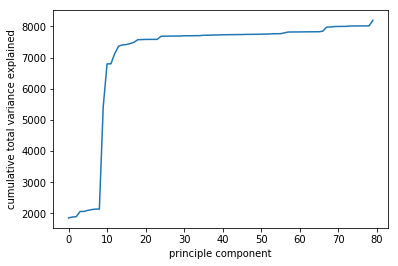

In [17]:
plt.plot(tot_var_list[:80])
plt.xlabel('principle component')
plt.ylabel('cumulative total variance explained')

In [126]:
def get_pc_proj(x):
    return freq_matrix@x

In [37]:
pc_proj_list=[get_pc_proj(i) for i in pc[:30]]

Text(0, 0.5, 'Projected Data')

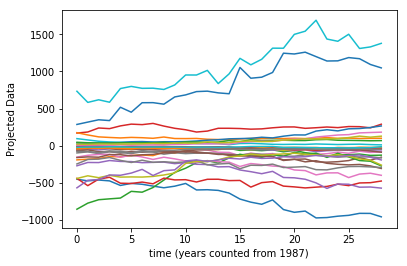

In [201]:
plt.plot(np.transpose(pc_proj_list))
plt.xlabel('time (years counted from 1987)')
plt.ylabel('Projected Data')

In [154]:
def find_inc_trend_pc(proj_data, alpha_level):
    time=range(29)
    slope, intercept, r_value, p_value, std_err=linregress(time, np.abs(proj_data))
    if slope < 0:
        return
    if p_value > alpha_level:
        return
    return [slope, p_value]

In [155]:
pc_with_large_var=np.array([find_inc_trend_pc(i, 0.001) for i in pc_proj_list])

In [156]:
print(pc_with_large_var)

[list([21.20055488616582, 1.2348521742537963e-16]) None
 list([4.847235763958911, 2.452888725157853e-14]) None
 list([1.057658876329442, 8.700107055583753e-06])
 list([5.546105829052995, 7.007709085933651e-11])
 list([4.449971262964449, 7.790280257734495e-08])
 list([2.548497440230923, 1.3954640267641377e-11])
 list([1.021394315134158, 3.3925961693653174e-08])
 list([35.20026719010463, 1.7143349628435058e-12])
 list([35.29887836351271, 6.38296152577511e-14]) None None None
 list([14.4654233739068, 1.8912132379016302e-13])
 list([9.69073174916957, 1.0673136022972351e-19])
 list([11.07343193678815, 3.517655866056824e-17])
 list([4.435257483847732, 1.230570074721643e-08]) None None
 list([8.18272042978927, 9.059405746862961e-15]) None
 list([1.6223164409146933, 2.7981065985820413e-09])
 list([1.8356929949586824, 2.861938184864574e-10]) None None
 list([6.365619489467874, 1.317680270001843e-12]) None
 list([3.9498889366398204, 3.029095636819236e-16]) None]


In [100]:
# Find words in corresponding PCs
index_of_pc=np.argwhere(pc_with_large_var!=None)
all_imword_list=np.array([])
for i in pc[index_of_pc]:
    index=np.argwhere(i[0]!=0)
    imword_list=word_list[index]
    all_imword_list=np.append(all_imword_list, imword_list)


In [104]:
all_imword_list.sort()
final_imword_list=np.unique(all_imword_list)

In [108]:
print('no. of imporatant words =', len(final_imword_list))

no. of imporatant words = 1035


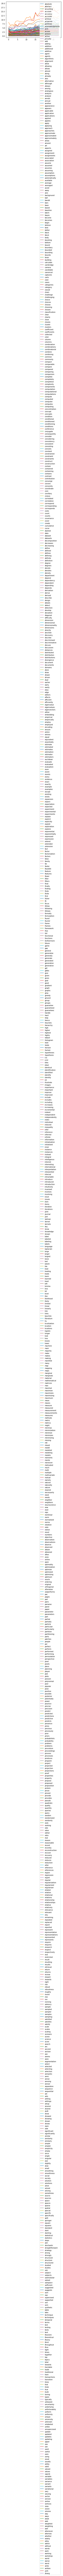

In [111]:
imword_table=freq_mat[final_imword_list].plot()

In [124]:
imword_table=freq_mat[final_imword_list].values

In [161]:
def word_trend(data, alpha_level):
    time=range(29)
    slope, intercept, r_value, p_value, std_err=linregress(time, data)
    if p_value > alpha_level:
        return 0
    return slope

In [192]:
word_trend_slope=np.array([word_trend(imword_table[:,i], 0.001) for i in range(len(final_imword_list))])
word_trend_slope

array([0.00828288, 0.        , 0.02963656, ..., 0.01024074, 0.        ,
       0.0221794 ])

In [198]:
threshold=np.sort(word_trend_slope)[::-1][50]
threshold

0.11553527465397545

In [199]:
sig_inc_word_list=final_imword_list[np.where(word_trend_slope > threshold)]

In [200]:
sig_inc_word_list

array(['algorithms', 'also', 'analysis', 'approach', 'based', 'bound',
       'case', 'consider', 'convex', 'data', 'dataset', 'distribution',
       'features', 'first', 'following', 'given', 'graph', 'inference',
       'kernel', 'large', 'latent', 'let', 'linear', 'loss', 'machine',
       'methods', 'model', 'models', 'norm', 'optimization', 'pages',
       'parameters', 'prior', 'probability', 'problem', 'proposed',
       'random', 'results', 'sample', 'samples', 'sampling', 'section',
       'set', 'setting', 'show', 'sparse', 'theorem', 'use', 'using',
       'variables'], dtype=object)